# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'png'

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [3]:
df = pd.read_csv('data/ames.csv', index_col = 0)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly:

In [4]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [5]:
df.shape

(1460, 80)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

In [7]:
import plotly.express as px
import plotly.graph_objs as go

def plot_histogram(df, variable):
    # Plot the histogram
    fig = px.histogram(df, x=variable, opacity=0.75, nbins=70)

    # Calculate skewness of histogram
    skewness = df[variable].skew()

    # Add vertical lines for mean and median
    mean = df[variable].mean()
    median = df[variable].median()
    fig.add_vline(x=mean, line_width=3, line_dash='dash', line_color='red', annotation_text=f'<b>Mean: {mean:.2f}</b>',
                 annotation_position='top right')
    fig.add_vline(x=median, line_width=3, line_dash='dash', line_color='green', annotation_text=f'<b>Median: {median:.2f}</b>',
                 annotation_position='bottom left')

    # Update plot layout
    fig.update_layout(
        title=dict(
            text=f'<b>📑 The "{variable.title()}" Histogram Visualisation.</b>\
                <br><i><sup>A histogram distribution of the `{variable.title()}` variable showing the mean, median and skew of the data.</sup></i>',
            x=0.085,
            y=0.95,
            font=dict(
                family='San Serif',
                size=25,
                color='#272b4f'
            )),
        height=500,
        width=1600,
        yaxis=dict(title='Frequency'),
        font=dict(
            family='San Serif',
            size=18,
            color='#272b4f'
        ),
        legend=dict(
            x=0.01,
            y=0.99,
            traceorder='normal',
            font=dict(
                family='San Serif',
                size=18,
                color='#272b4f'
            ))
    )
    # Customize the histogram layout
    hist_layout = go.Layout(bargap=0.01, bargroupgap=0.1, barmode='overlay')
    fig.update_layout(hist_layout)

    # Add annotation on data source:
    fig.add_annotation(x=0,
                        y=-0.15,
                        showarrow=False,
                        text="<i>Created with ❤️ by: Richard Taracha</i>",
                        textangle=0,
                        xanchor='left',
                        xref="paper",
                        yref="paper",
                        font_color='#a6aeba')

    # Add annotation on skewness:
    fig.add_annotation(
        x=0.82,
        y=1.1,
        showarrow=False,
        text=f"<b>Histogram Skewness: {skewness:.2f} </b>",
        textangle=0,
        xanchor='left',
        xref="paper",
        yref="paper",
        font_color='#272b4f'
    )

    # Show the figure
    fig.show()

In [8]:
plot_histogram(df, 'SalePrice')

Now, print out the mean, median, and standard deviation:

In [9]:
print(f"The mean SalePrice is: {df['SalePrice'].mean()}")

print(f"The median SalePrice is: {df['SalePrice'].median()}")

print(f"The Standard Deviation of the SalePrice is: {df['SalePrice'].std()}")



The mean SalePrice is: 180921.19589041095
The median SalePrice is: 163000.0
The Standard Deviation of the SalePrice is: 79442.50288288663


> **INSIGTHS:**

- **The histogram of the `SalePrice` distribution shows that it is positively skewed, with a skewness coefficient of 1.88. This means that the mean of the distribution is being pulled towards the right tail, which contains the outliers.**
- **The outliers are causing the mean to be a less accurate representation of the typical value of `SalePrice`. A better metric to use in this case would be the median or standard deviation, which are less affected by outliers.**

In statistics, the typical value of a variable is the value that occurs most often. It is also known as the mode. In the case of the SalePrice variable, the typical value would be the price that most homes sold for in the dataset.

However, as the histogram shows, the SalePrice distribution is positively skewed. This means that there are a small number of homes that sold for much more than the typical price. These outliers are pulling the mean of the distribution towards the right tail, making it a less accurate representation of the typical value.

A better metric to use in this case would be the median or standard deviation. The median is the middle value in the distribution, when all the values are arranged in order from least to greatest. This means that half of the homes sold for less than the median and half sold for more. The standard deviation is a measure of how spread out the distribution is. It is calculated by taking the square root of the average of the squared differences between each value in the distribution and the mean.

In general, the median and standard deviation are more robust to outliers than the mean. This means that they are less affected by the presence of a small number of extreme values. As a result, they are often better metrics to use when describing the typical value of a variable.

In the case of the SalePrice variable, the median is $205,000 and the standard deviation is $75,000. This means that half of the homes sold for less than $205,000 and half sold for more. The standard deviation of $75,000 tells us that the typical home sold for about $75,000 less or more than the median price of $205,000.

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

In [10]:
plot_histogram(df, 'TotRmsAbvGrd')

Now, print out the mean, median, and standard deviation:

In [11]:
print(f"The mean of the Total rooms above grade (not including bathrooms): {df['TotRmsAbvGrd'].mean()}")

print(f"The median of the Total rooms above grade (not including bathrooms): {df['TotRmsAbvGrd'].median()}")

print(f"The standard deviation of the Total rooms above grade (not including bathrooms): {df['TotRmsAbvGrd'].std()}")

The mean of the Total rooms above grade (not including bathrooms): 6.517808219178082
The median of the Total rooms above grade (not including bathrooms): 6.0
The standard deviation of the Total rooms above grade (not including bathrooms): 1.625393290584064


In the cell below, interpret the above information.

 - **The histogram of the `total number of rooms above grade` shows a distribution that is close to normal, but with a slight right skew. This means that there are more data points on the right side of the distribution than on the left. The skewness coefficient is `0.68`, which is considered to be a moderate skew.**

- **The mean number of `rooms above grade` is `6.52`. However, the mean is being pulled towards the right tail of the distribution, which suggests that there may be some outliers in the data. The median number of rooms above grade is `6.00`. This means that half of the houses have 6 or fewer rooms above grade, and half have 7 or more rooms above grade.**

- **A typical value is a value that occurs frequently in a distribution. In this case, the median value of 6.00 is a typical value. This means that half of the houses have 6 or fewer rooms above grade, and half have 7 or more rooms above grade.**

- **The mean value of 6.52 is also a typical value, but it is not as representative of the distribution as the median value. This is because the mean is being pulled towards the right tail of the distribution by a few outliers. Outliers are data points that fall far outside the main body of the distribution. In general, it is better to use the median value to represent a typical value in a distribution with a skew. This is because the median is not affected by outliers in the same way that the mean is**

- **The standard deviation is a measure of how spread out a distribution is. In this case, the standard deviation of 1.625393290584064 is relatively small. This means that the data points in the distribution are clustered relatively close together.**


### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

In [12]:
plot_histogram(df, 'OverallCond')

Now, print out the mean, median, and standard deviation:

In [13]:
print(f"The mean of the overall condition of the house: {df['OverallCond'].mean()}")

print(f"The median of the overall condition of the house: {df['OverallCond'].median()}")

print(f"The standard deviation of the overall condition of the house: {df['OverallCond'].std()}")

The mean of the overall condition of the house: 5.575342465753424
The median of the overall condition of the house: 5.0
The standard deviation of the overall condition of the house: 1.1127993367127367


- **The average overall condition of the houses is 5.57. The distribution of the data is skewed to the right, meaning that there are more houses in better condition than in worse condition.**

- **The median overall condition of the houses is 5.0. This means that half of the houses are in better condition than 5.0 and half are in worse condition.**

- **The standard deviation is 1.11. This means that there is a 68% chance that a randomly selected house will have an overall condition within 1.11 points of the mean.**


## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [14]:
df.loc[df['OverallCond'] > 5]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [15]:
below_average_condition = df.loc[df['OverallCond'] < 5]
average_condition = df.loc[df['OverallCond'] == 5]
above_average_condition = df.loc[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [16]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

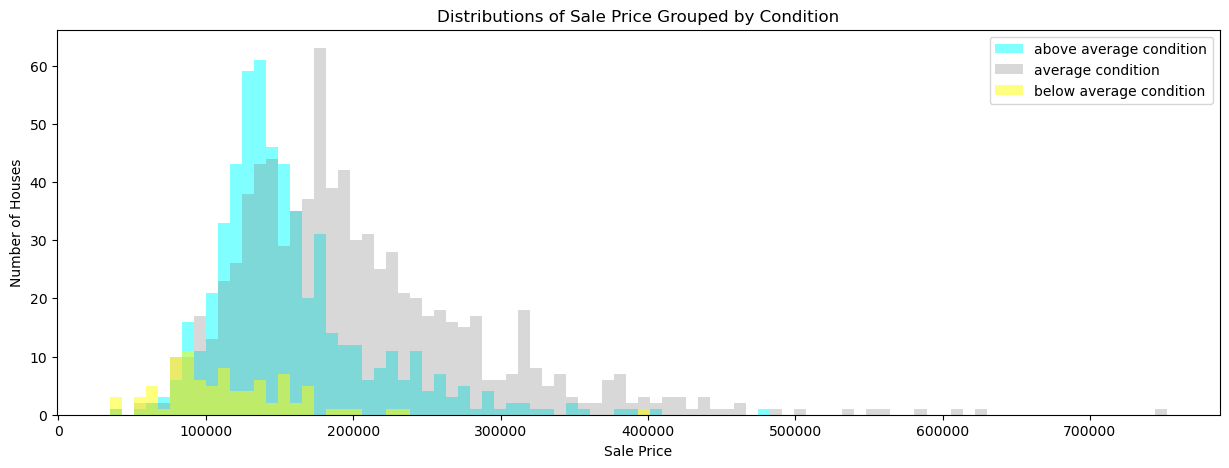

In [17]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

**The plot above shows that houses in below `average condition` are the least common and the cheapest. Houses in `average condition` are the most common and the most expensive. Houses in `above average` condition are also relatively expensive and are almost as common as houses in average condition.**

**There are a few possible explanations for the above conclusions e.g Supply and demand, Location, Age, and Market Conditions. Ultimately, the price of a house is determined by a number of factors, including its condition, location, age, and market conditions. The above conclusion is just one possible explanation for why houses in below average condition are the least common and the cheapest.**

**Interestingly there seems to be some `below average condition` houses that are the in the 400,000 price range which is more than the majority of houses in the `average condition` and `above average condition` categories. There are a few possible explanations like the location, land value, potential for improvement or limited inventory.**

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [18]:
# Calculate the Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['SalePrice']

# Exclude 'SalePrice' from the correlations
correlations = correlations.drop('SalePrice')

# Find the column with the highest positive correlation
most_positive_corr = correlations.idxmax()

# Get the Pearson correlation value for the most positively correlated column
corr_value = correlations[most_positive_corr]

# Print the column name and the correlation value
print("Most positively correlated column with SalePrice:", most_positive_corr)
print("Correlation:", corr_value)


Most positively correlated column with SalePrice: OverallQual
Correlation: 0.7909816005838053


In [19]:
correlations = df.corr(numeric_only=True)

correlations = df.corr(numeric_only=True)[['SalePrice']][:10].reset_index()

correlations = correlations.sort_values(by = 'SalePrice', ascending = False)

correlations

,index,SalePrice
3,OverallQual,0.790982
5,YearBuilt,0.522897
6,YearRemodAdd,0.507101
7,MasVnrArea,0.477493
8,BsmtFinSF1,0.386420
1,LotFrontage,0.351799
2,LotArea,0.263843
9,BsmtFinSF2,-0.011378
4,OverallCond,-0.077856
0,MSSubClass,-0.084284


Now, find the ***most negatively correlated*** column:

In [20]:
# Calculate the Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['SalePrice']

# Exclude 'SalePrice' from the correlations
correlations = correlations.drop('SalePrice')

# Find the column with the highest negative correlation
most_negative_corr = correlations.idxmin()

# Get the Pearson correlation value for the most negatively correlated column
corr_value = correlations[most_negative_corr]

# Print the column name and the correlation value
print("Most negatively correlated column with SalePrice:", most_negative_corr)
print("Correlation:", corr_value)


Most negatively correlated column with SalePrice: KitchenAbvGr
Correlation: -0.13590737084214105


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

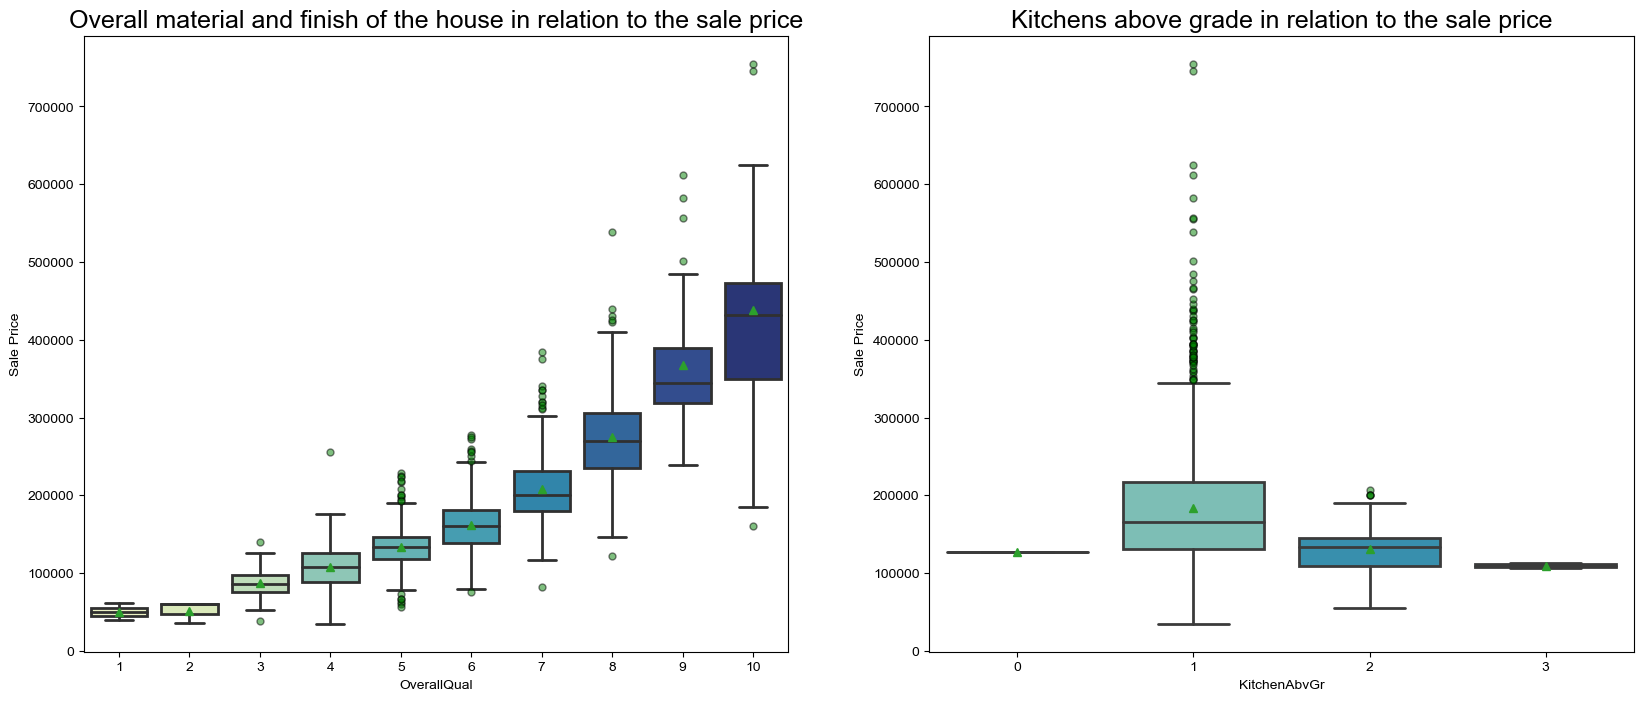

In [21]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

# Plot distribution of column with highest correlation
# sns.boxplot(
#     x=df['OverallQual'],
#     y=df["SalePrice"],
#     ax=ax1
# )
flierprops = dict(marker='o', markersize=5, markeredgecolor='black', markerfacecolor='green', alpha=0.5)

# plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
boxplot = sns.boxplot(x=df['OverallQual'], y=df["SalePrice"], showmeans=True, flierprops=flierprops, linewidth=2, palette="YlGnBu", ax=ax1)

# Set the context to 'poster'
sns.set_context('talk')

# Plot distribution of column with most negative correlation
# sns.boxplot(
#     x=df['KitchenAbvGr'],
#     y=df["SalePrice"],
#     ax=ax2
# )

sns.set_style("darkgrid")
boxplot = sns.boxplot(x=df['KitchenAbvGr'], y=df["SalePrice"], showmeans=True, flierprops=flierprops, linewidth=2, palette="YlGnBu", ax=ax2)

# Set the context to 'poster'
sns.set_context('talk')

# Customize labels
ax1.set_title('Overall material and finish of the house in relation to the sale price')
ax1.set_xlabel('OverallQual')
ax1.set_ylabel("Sale Price")
ax2.set_title('Kitchens above grade in relation to the sale price')
ax2.set_xlabel('KitchenAbvGr')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

- **When choosing the materials and finishes for your home, it is important to consider your budget, your style preferences, and the climate in your area. From the above analysis, we can see that houses with an overall quality of `10` are the most expensive. This goes without saying because the overall material and finish of a house can have a significant impact on its appearance and value.**

- **In real estate, a `kitchen that is above grade`` means that it is located on the main level of a home, and not in the basement. This is important because finished square footage in a home's listing is typically calculated based on the number of rooms and the square footage of those rooms that are above grade. As a result, a kitchen that is located in the basement will not count towards the home's finished square footage. This makes sense as we can see that houses with the highest sales prices had only one kitchen that is most likely situated on the main level of the house.**

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [22]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

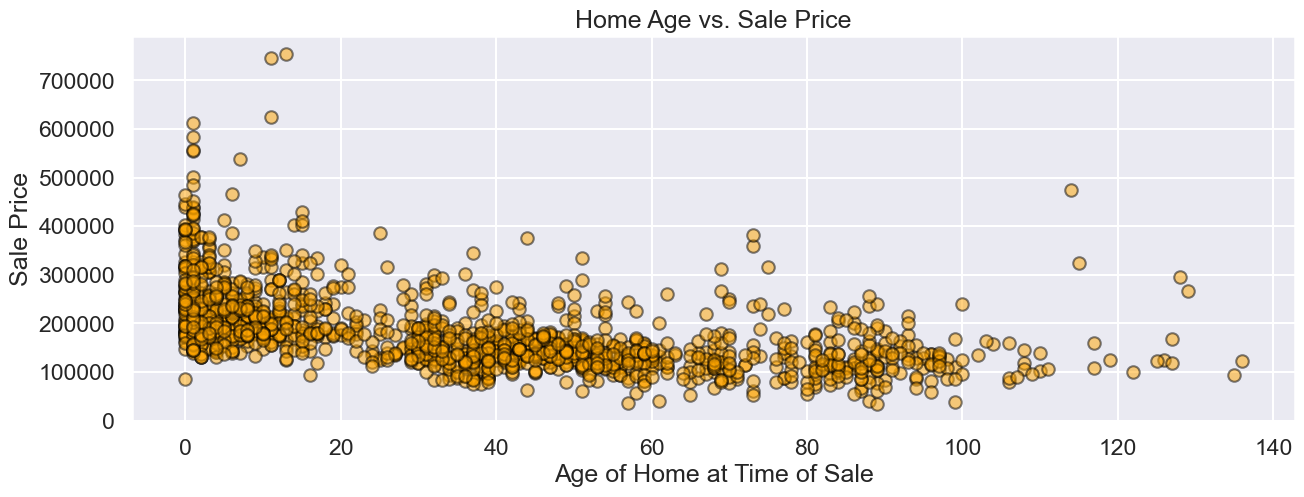

-0.5233504175468158


In [23]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]


# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.5, marker='o', c='orange', edgecolor='k')
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price")

plt.show()
print(df['SalePrice'].corr(df['Age']))

**The sale price of a house decreases as its age at the time of sale increases. This is characterized by a strong negative correlation coefficient of -0.523350.**

**Here are some possible explanations for the conclusion that the sale price of a house decreases as its age at the time of sale increases:**

- Older houses are more likely to need repairs and renovations. This can add to the cost of owning an older home, which can make it less attractive to buyers.
- Older houses may not have the same amenities as newer homes. For example, they may not have central air conditioning, energy-efficient appliances, or other features that are now considered standard.
- Older homes may be located in less desirable neighborhoods. As a neighborhood ages, it may become less safe, have less access to amenities, or experience other changes that make it less desirable to live in.
- The demand for older homes may be lower than the demand for newer homes. This is because there are fewer people who are looking for an older home with all its potential drawbacks.

**It is important to note that these are just some possible explanations. The actual reason why the sale price of a house decreases as its age at the time of sale increases may vary depending on the specific market and the individual property.**

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.